# Research

## Imports

In [2]:
import pandas as pd
import pandas_datareader as dr
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import datetime
import mplfinance as mpl
import plotly.graph_objects as go
import plotly

## Data Import

In [3]:
df = pd.read_csv('data/data2.csv', index_col='Symbol')

## Sorting Data

In [4]:
df

,Name,Sector
Symbol,,
MMM,3M,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie,Health Care
ABMD,Abiomed,Health Care
ACN,Accenture,Information Technology
...,...,...
YUM,Yum! Brands,Consumer Discretionary
ZBRA,Zebra Technologies,Information Technology
ZBH,Zimmer Biomet,Health Care


In [5]:
isInfoTech = df['Sector']== 'Information Technology'

In [6]:
print(isInfoTech.head())

Symbol
MMM     False
ABT     False
ABBV    False
ABMD    False
ACN      True
Name: Sector, dtype: bool


In [7]:
df_InfoTech = df[isInfoTech]

In [8]:
df_InfoTech

,Name,Sector
Symbol,,
ACN,Accenture,Information Technology
ADBE,Adobe,Information Technology
AMD,Advanced Micro Devices,Information Technology
AKAM,Akamai Technologies,Information Technology
APH,Amphenol Corp,Information Technology
...,...,...
V,Visa,Information Technology
WDC,Western Digital,Information Technology
WU,Western Union,Information Technology


## IBM INTEL NVIDIA

In [9]:
#looking at IBM,INTEL,NVIDIA,

In [10]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2021,6,22)

In [11]:
ibm  = web.DataReader("IBM",'yahoo',start,end)
intel = web.DataReader("INTC",'yahoo',start,end)
nvidia = web.DataReader("NVDA",'yahoo',start,end)
trch = web.DataReader("TRCH",'yahoo',start,end)

In [12]:
ibm.to_csv('IBM_STOCK.csv')
#ibm stock
intel.to_csv('INTC_STOCK.csv')
nvidia.to_csv('NVDA_STOCK.csv')
trch.to_csv('TRCH_STOCK.csv')

In [13]:
ibm.head()
trch.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-16,6.76,5.33,5.81,5.99,186916700,5.99
2021-06-17,5.58,4.86,5.41,5.40,65072900,5.40
2021-06-18,6.50,5.31,5.40,6.27,74191100,6.27
2021-06-21,10.88,8.07,8.90,9.92,402629200,9.92
2021-06-22,10.21,6.88,10.06,7.00,222498100,7.00


In [14]:
intel.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,36.930000,36.270000,36.610001,36.599998,20196500.0,32.651402
2017-01-04,36.770000,36.340000,36.709999,36.410000,15915700.0,32.481903
2017-01-05,36.720001,36.310001,36.450001,36.349998,13986000.0,32.428375
2017-01-06,36.680000,36.189999,36.590000,36.480000,15114000.0,32.544357
2017-01-09,36.889999,36.480000,36.480000,36.610001,19461400.0,32.660336


In [15]:
nvidia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,106.370003,99.379997,104.400002,102.010002,37549900.0,100.713028
2017-01-04,105.500000,101.529999,103.400002,104.389999,29980500.0,103.062767
2017-01-05,105.820000,101.050003,104.529999,101.739998,24607400.0,100.446442
2017-01-06,104.250000,101.199997,102.849998,103.099998,20571400.0,101.789177
2017-01-09,108.000000,103.500000,103.500000,107.279999,22906200.0,105.916039


Text(0.5, 1.0, 'Stock Prices of IBM,Intel and Nvidia')

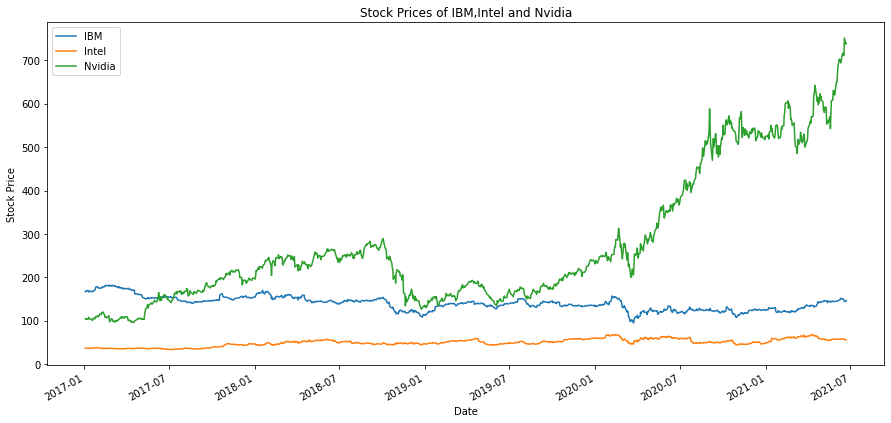

In [16]:
ibm['Open'].plot(label='IBM',figsize=(15,7))
intel['Open'].plot(label='Intel')
nvidia['Open'].plot(label='Nvidia')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Stock Prices of IBM,Intel and Nvidia')

## Volumes

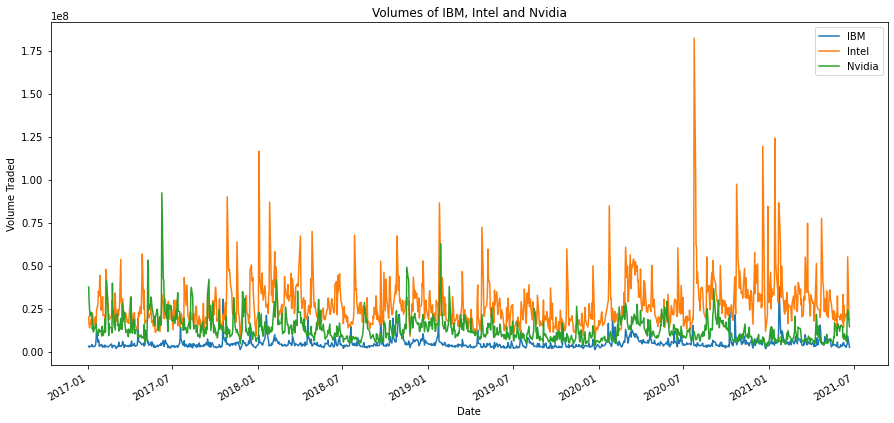

In [17]:
ibm['Volume'].plot(label='IBM',figsize=(15,7))
intel['Volume'].plot(label='Intel')
nvidia['Volume'].plot(label='Nvidia')
plt.ylabel('Volume Traded')
plt.title('Volumes of IBM, Intel and Nvidia')
plt.legend()

## Total Traded / ~Market Cap

In [18]:
ibm['Total Traded'] = ibm['Open'] * ibm['Volume']
intel['Total Traded'] = intel['Open'] * intel['Volume']
nvidia['Total Traded'] = nvidia['Open'] * nvidia['Volume']

Text(0.5, 1.0, 'Total Traded for IBM, Intel, and Nvidia')

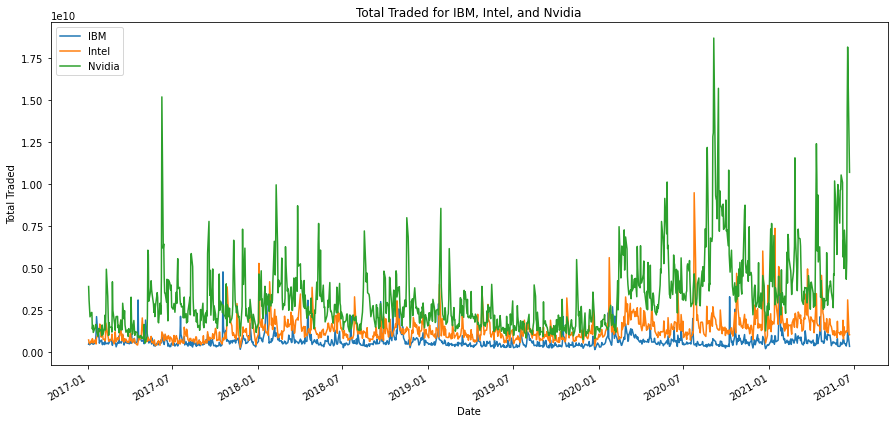

In [19]:
ibm['Total Traded'].plot(label=('IBM'),figsize=(15,7))
intel['Total Traded'].plot(label=('Intel'))
nvidia['Total Traded'].plot(label=('Nvidia'))
plt.ylabel('Total Traded')
plt.legend()
plt.title('Total Traded for IBM, Intel, and Nvidia')

## 50 and 200 Day Rolling EMA

Text(0.5, 1.0, 'Intel Open, 50EMA, 200EMA')

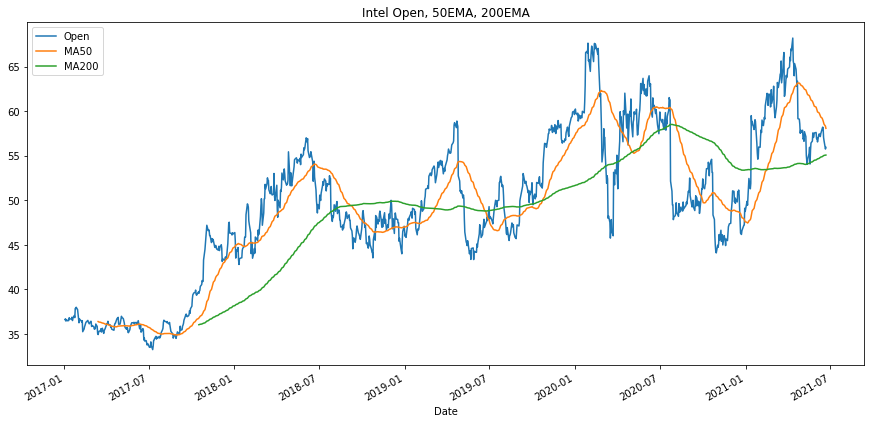

In [20]:
intel['Open'].plot(figsize=(15,7))
intel['MA50']=intel['Open'].rolling(50).mean()
intel['MA50'].plot(label='MA50')
intel['MA200']=intel['Open'].rolling(200).mean()
intel['MA200'].plot(label='MA200')
plt.legend()
plt.title('Intel Open, 50EMA, 200EMA')

Text(0.5, 1.0, 'IBM Open, 50EMA, 200EMA')

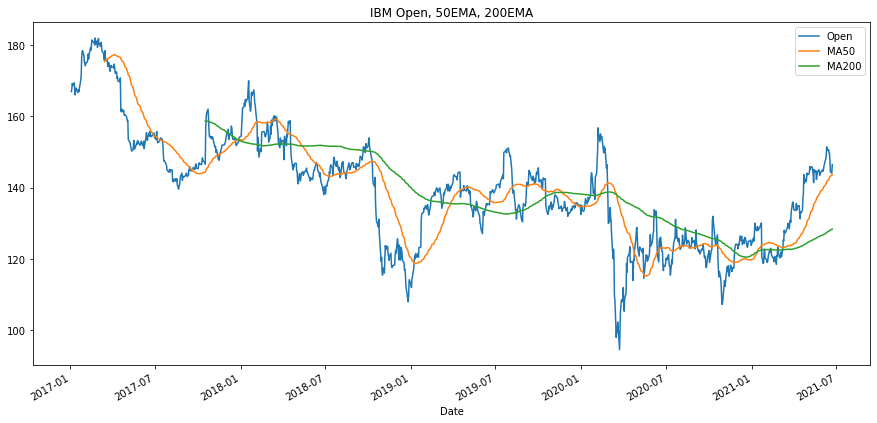

In [21]:
ibm['Open'].plot(figsize=(15,7))
ibm['MA50']=ibm['Open'].rolling(50).mean()
ibm['MA50'].plot(label='MA50')
ibm['MA200']=ibm['Open'].rolling(200).mean()
ibm['MA200'].plot(label='MA200')
plt.legend()
plt.title('IBM Open, 50EMA, 200EMA')

Text(0.5, 1.0, 'Nvidia Open, 50EMA, 200EMA')

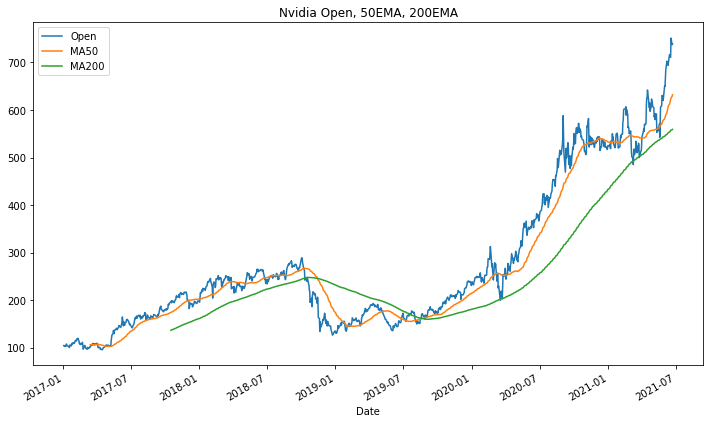

In [22]:
nvidia['Open'].plot(figsize=(12,7))
nvidia['MA50']=nvidia['Open'].rolling(50).mean()
nvidia['MA50'].plot(label='MA50')
nvidia['MA200']=nvidia['Open'].rolling(200).mean()
nvidia['MA200'].plot(label='MA200')
plt.legend()
plt.title('Nvidia Open, 50EMA, 200EMA')

Text(0.5, 1.0, 'Torchlight Open, 50EMA, 200EMA')

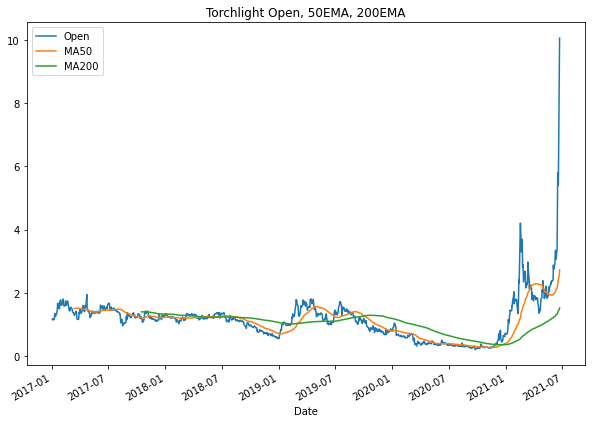

In [23]:
trch['Open'].plot(figsize=(10,7))
trch['MA50']=trch['Open'].rolling(50).mean()
trch['MA50'].plot(label='MA50')
trch['MA200']=trch['Open'].rolling(200).mean()
trch['MA200'].plot(label='MA200')
plt.legend()
plt.title('Torchlight Open, 50EMA, 200EMA')

## Time Series Analysis AutoCorrelation

In [24]:
def autocorr_daily(intel):
    
    returns = intel.pct_change()
    autocorrelation = returns['Adj Close'].autocorr()
    
    return autocorrelation

autocorr_daily(intel)

-0.2239831051070824

In [25]:
autocorr_daily(ibm)

-0.1067155809930353

In [26]:
autocorr_daily(nvidia)

-0.12985358703478336

In [27]:
autocorr_daily(trch)

-0.049876872094528166

## Scatter Matrix Based off Open Price

In [28]:
from pandas.plotting import scatter_matrix

In [29]:
tech_comp = pd.concat([ibm['Open'],intel['Open'],nvidia['Open']],axis =1)
tech_comp.columns = ['IBM Open','Intel Open','Nvidia Open']

array([[<AxesSubplot:xlabel='IBM Open', ylabel='IBM Open'>,
        <AxesSubplot:xlabel='Intel Open', ylabel='IBM Open'>,
        <AxesSubplot:xlabel='Nvidia Open', ylabel='IBM Open'>],
       [<AxesSubplot:xlabel='IBM Open', ylabel='Intel Open'>,
        <AxesSubplot:xlabel='Intel Open', ylabel='Intel Open'>,
        <AxesSubplot:xlabel='Nvidia Open', ylabel='Intel Open'>],
       [<AxesSubplot:xlabel='IBM Open', ylabel='Nvidia Open'>,
        <AxesSubplot:xlabel='Intel Open', ylabel='Nvidia Open'>,
        <AxesSubplot:xlabel='Nvidia Open', ylabel='Nvidia Open'>]],
      dtype=object)

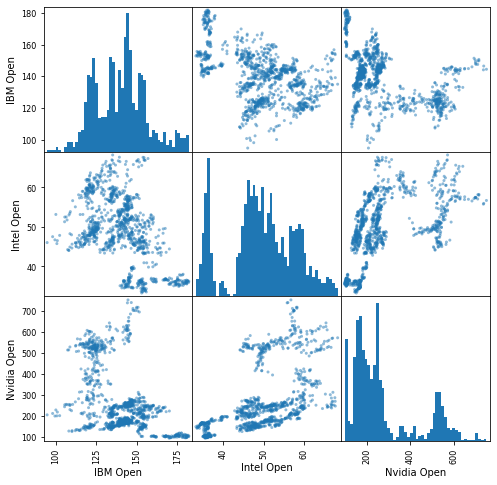

In [30]:
scatter_matrix(tech_comp,figsize=(8,8),hist_kwds={'bins':50})

CandleStick Analysis

## CandleStick Analysis

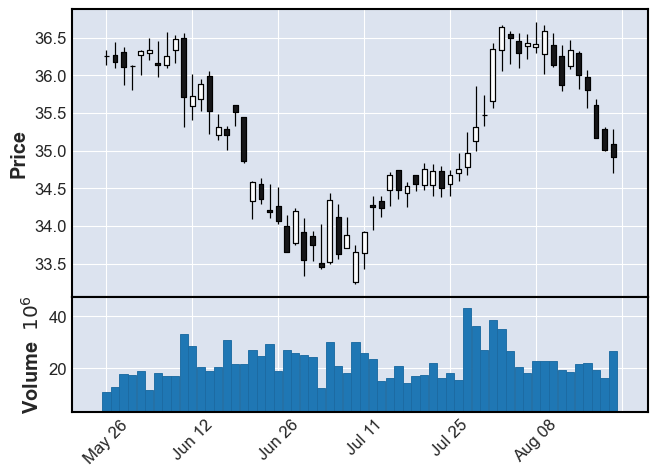

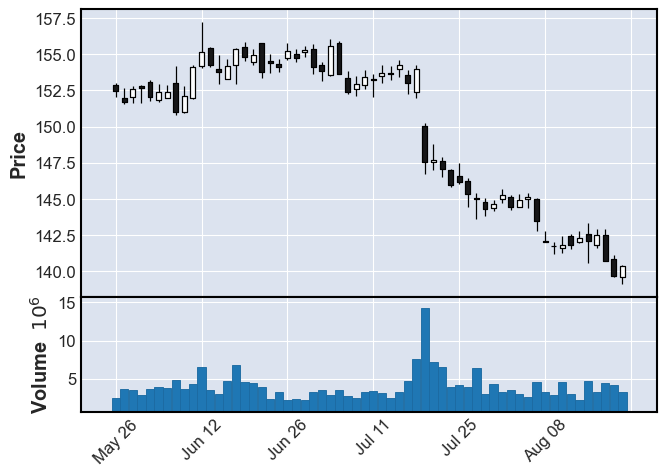

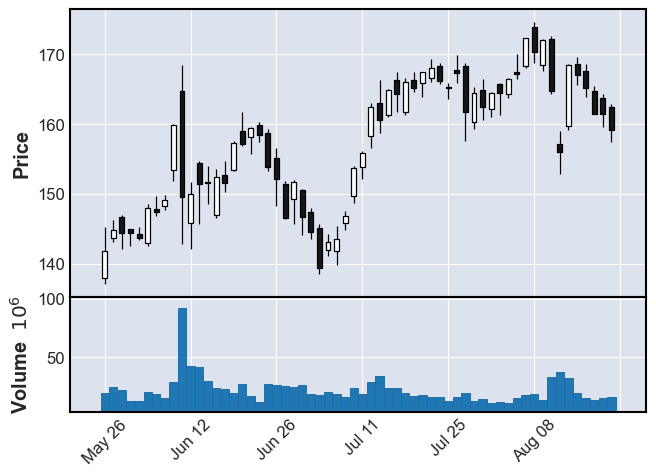

In [31]:
candleIntel = intel.iloc[100:160]
mpl.plot(candleIntel,type='candle',volume=True)
candleIBM = ibm.iloc[100:160]
mpl.plot(candleIBM,type='candle',volume=True)
candleNvidia = nvidia.iloc[100:160]
mpl.plot(candleNvidia,type='candle',volume=True)

## Monte Carlo Stock Price Predictor

In [37]:
monte_end   = datetime.datetime.now()
monte_start = monte_end - datetime.timedelta(days=300)



prices = web.DataReader("NVDA",'yahoo',monte_start,monte_end)['Close']
returns = prices.pct_change()
meanReturns = returns.mean()

last_price = prices[-1]

num_sims = 100
num_days = 300

sim_df = pd.DataFrame()

for x in range(num_sims):
    count = 0
    daily_volatility = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0,daily_volatility))
    price_series.append(price)

    
    for y in range(num_days):
        if count == 299:
            break
        price = price_series[count] * (1 + np.random.normal(0,daily_volatility))
        price_series.append(price)
        count += 1
        
        sim_df[x] = pd.Series(price_series)
       


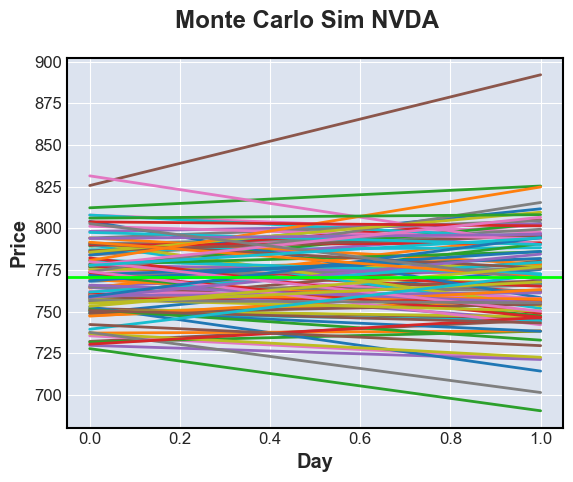

In [38]:
fig = plt.figure()
fig.suptitle('Monte Carlo Sim NVDA')
plt.plot(sim_df)
plt.axhline(y = last_price, color = 'lime',linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()


In [40]:
import plotly_express as px
fig2 = px.line(sim_df)
fig2.show()


In [39]:
pd.set_option('display.max_columns',100)

sim_df
sim_df.drop(index=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,749.057334,775.141713,789.37056,776.845492,765.200249,732.210257,785.337922,790.727334,773.278487,780.872345,757.59766,764.180036,812.315491,758.52683,764.609629,751.92801,807.952505,783.969427,749.528776,787.142317,768.250704,747.719103,759.946462,785.897679,778.559315,761.274864,775.731082,758.192154,750.67251,749.26914,784.062748,769.203629,776.978244,778.010683,798.150866,756.22567,735.545291,764.867094,775.256236,790.085382,804.189563,794.263077,731.78984,760.489364,729.825077,825.669678,762.197127,771.639458,791.505235,807.970657,752.854251,737.194088,771.7387,789.94706,778.172932,786.46048,831.478619,794.171486,736.818518,780.961326,750.285213,759.826464,778.312402,782.229961,759.556625,749.081205,801.240811,773.855409,785.693255,761.783333,772.185098,747.350982,727.865903,773.510868,765.949204,790.898154,774.073484,737.620052,757.330027,797.547866,768.588039,780.75201,751.318341,730.520015,758.489446,750.761274,780.0289,756.758817,755.00806,739.497365,759.096141,791.690791,806.134961,803.889454,793.925033,742.327941,777.85474,802.819454,753.23273,777.779412
